<img src="https://i.imgur.com/olPPiRS.jpg" alt="Texto alternativo da imagem" style="float:left; margin-right:10px;" />

<h3 style="margin-left:150px; margin-right:10px;"> Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais
Campus Ibirité<h3>

<br></br>
* Autor: Pablo Teodoro Monteiro 
> Engenharia de Controle e Automação - IFMG
>> Cálculo Numérico
>>> Atividade 12

In [120]:
import math as m
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def pvi(b, a, M, f, y0):
    x_ = []
    y_ = []
    h = (b - a)/M
    x = a
    y = y0
    F = f(x, y)
    x_.append(x)
    y_.append(y)
    for i in range(M):
        x = a + i * h
        y = y + F * h
        F = f(x, y)
        x_.append(x)
        y_.append(y)
    return x_, y_

def kutta(b, a, M, f, y0):
    x_ = []
    y_ = []
    h = (b - a)/M
    x = a
    y = y0
    x_.append(x)
    y_.append(y)
    for i in range(1, M+1):
        K1 = f(a, y0)
        K2 = f((a + h/2), (y0 + K1 * h/2))
        K3 = f((a + h/2),((y0 + K2 * h/2)))
        K4 = f((a + h),(y0 + K3 * h))
        y1 = y0 + h * (K1 + 2*K2 + 2*K3 + K4)/6
        a = a + h
        y0 = y1
        x_.append(a)
        y_.append(y1)
    return x_, y_
#Exemplos usados para testar durante o desenvolvimento:
#def f(x):
#    return (( ((x*m.exp(1)) ** (3*x)) / 5 ) - (((m.exp(1)) ** (3*x)) / 25) - (((m.exp(1)) ** (-2*x)) / 25) )
#def f_(x, y):
#    return ( ((x*m.exp(1)) ** (3*x)) / 5 ) - 2*y
#pvi(1, 0, 10, f_, 0)
#kutta(1, 0, 10, f_, 0)

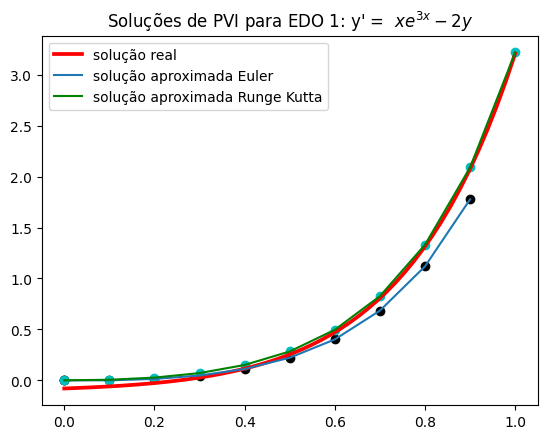

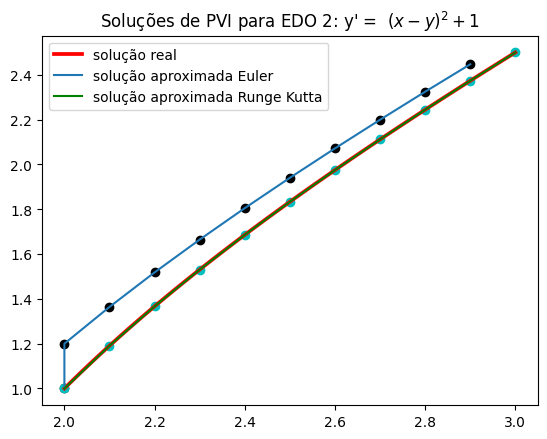

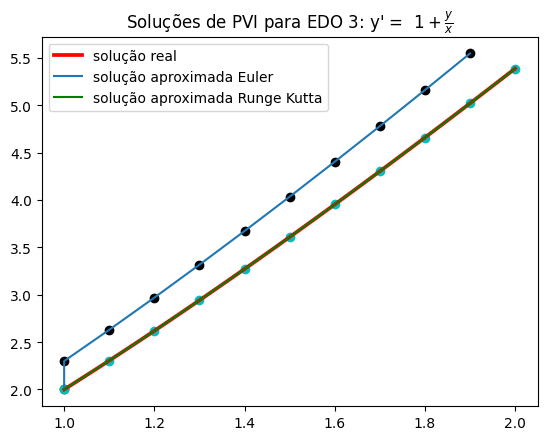

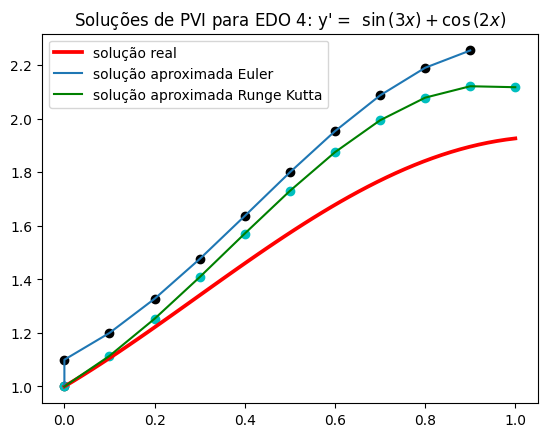

Tabela da EDO 1: 


,Valores em X,Solução Real,Método de Euler,Método Runge Kutta,Erro Abs. Euler,Erro Abs. Kutta
0,0.000000,-0.080000,0.000000,0.000000,0.080000,0.080000
1,0.000000,-0.080000,0,0.00575463131152366,0.0800000000000000,0.0857546313115237
2,0.100000,-0.059746,0,0.0268187705967712,0.0597464062746393,0.0865651768714105
3,0.200000,-0.026813,0.0134985880757600,0.0711551645153538,0.0403113899171856,0.0979679663567794
4,0.300000,0.027240,0.0472412464684182,0.150795060680180,0.0200016496890402,0.123555463900802
5,0.400000,0.114832,0.111581090509443,0.283643159044116,0.00325042783532999,0.168811640699343
6,0.500000,0.254186,0.222069549317016,0.496059711486905,0.0321166172564098,0.241873544913479
7,0.600000,0.471924,0.401740092970516,0.826540417642342,0.0701839357060315,0.354616388965795
8,0.700000,0.806753,0.684370922241190,1.33094440447376,0.122382190457911,0.524191291774655
9,0.800000,1.314705,1.11912863167269,2.08990160734167,0.195576673284519,0.775196302384466




Tabela da EDO 2: 


,Valores em X,Solução Real,Método de Euler,Método Runge Kutta,Erro Abs. Euler,Erro Abs. Kutta
0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
1,2.000000,1.000000,1.200000,1.190909,0.200000,0.190909
2,2.100000,1.190909,1.364000,1.366666,0.173091,0.175757
3,2.200000,1.366667,1.518170,1.530769,0.151503,0.164102
4,2.300000,1.530769,1.664659,1.685714,0.133890,0.154945
5,2.400000,1.685714,1.805025,1.833333,0.119310,0.147619
6,2.500000,1.833333,1.940424,1.975000,0.107091,0.141666
7,2.600000,1.975000,2.071737,2.111764,0.096737,0.136764
8,2.700000,2.111765,2.199643,2.244444,0.087878,0.132679
9,2.800000,2.244444,2.324679,2.373684,0.080234,0.129239




Tabela da EDO 3: 


,Valores em X,Solução Real,Método de Euler,Método Runge Kutta,Erro Abs. Euler,Erro Abs. Kutta
0,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
1,1.000000,2.000000,2.300000,2.304841,0.300000,0.304841
2,1.100000,2.304841,2.630000,2.618785,0.325159,0.313944
3,1.200000,2.618786,2.969091,2.941073,0.350305,0.322287
4,1.300000,2.941074,3.316515,3.271060,0.375442,0.329987
5,1.400000,3.271061,3.671632,3.608197,0.400571,0.337136
6,1.500000,3.608198,4.033891,3.952005,0.425693,0.343807
7,1.600000,3.952006,4.402817,4.302067,0.450811,0.350061
8,1.700000,4.302068,4.777993,4.658015,0.475925,0.355947
9,1.800000,4.658016,5.159052,5.019521,0.501036,0.361505




Tabela da EDO 4: 


,Valores em X,Solução Real,Método de Euler,Método Runge Kutta,Erro Abs. Euler,Erro Abs. Kutta
0,0.000000,1.000000,1,1,0.000000,0.000000
1,0.000000,1.000000,1.10000000000000,1.11422259959182,0.100000000000000,0.114222599591818
2,0.100000,1.105979,1.20000000000000,1.25293090533928,0.0940208605495503,0.146951765888832
3,0.200000,1.221022,1.32755867845026,1.40845175999911,0.106536505296895,0.187429586845751
4,0.300000,1.340543,1.47612902519005,1.57122625952187,0.135586326795759,0.230683561127582
5,0.400000,1.459776,1.63699527764377,1.73049086605814,0.177219468643060,0.270715057057432
6,0.500000,1.573968,1.79986985717521,1.87508832068056,0.225901800060637,0.301120263565988
7,0.600000,1.678567,1.95364958642243,1.99434192183752,0.275082628264370,0.315774963679464
8,0.700000,1.769402,2.08727012495791,2.07891995120454,0.317867640930429,0.309517467177061
9,0.800000,1.842853,2.19058777591282,2.12161659014078,0.347734466958308,0.278763281186265


In [121]:
#1
M = 10

def fa(x, y):
    return (x * (sp.exp(3*x))) - 2*y  #aqui foi usado sp. ao inves de m. para permitir a conversão em latex pela lib sympy

def s1(x): #foi necessário criar variavel auxiliar por conta de erros em declarações que fazem multiplicação dentro do "exp()"
    A = 3*x
    B = -2*x
    return x * np.exp(A)/5 - np.exp(A)/25 - np.exp(B)/25

def fb(x, y):
    return 1 + (x - y)**2

def s2(x):
    return x + 1/(1 - x)

def fc(x, y):
    return 1 + y / x

def s3(x):
    return x * np.log(x) + 2*x

def fd(x, y):
    return sp.cos(2*x) + sp.sin(3*x) #aqui foi usado sp. ao inves de m. para permitir a conversão em latex pela lib sympy

def s4(x):
    return np.sin(2*x)/2 - np.cos(2*x)/3 + 4/3 #aqui foi utilizado np. ao inves de m. para permitir que fosse plotado na tabela

sol = [s1, s2, s3, s4]
funcs = [fa, fb, fc, fd]
a = [0., 2, 1, 0]
b = [1., 3, 2, 1]
y0 = [0., 1, 2, 1]

soluts_euler = []
soluts_kutta = []

for i in range(len(funcs)):
    soluts_euler.append(pvi(b[i], a[i], M, funcs[i], y0[i]))
    soluts_kutta.append(kutta(b[i], a[i], M, funcs[i], y0[i]))
    plt.figure(i+1)
    
    x = np.linspace(a[i], b[i])
    y = sol[i](x)
    plt.plot(x, y, label='solução real', linewidth=2.7, color='r')
    plt.plot(soluts_euler[i][0], soluts_euler[i][1], label='solução aproximada Euler')
    plt.plot(soluts_kutta[i][0], soluts_kutta[i][1], label='solução aproximada Runge Kutta', color='g')
    plt.scatter(soluts_euler[i][0], soluts_euler[i][1], color='k')
    plt.scatter(soluts_kutta[i][0], soluts_kutta[i][1], color='c')
    # Para poder escrever as equações, baseado nas funções foi utilizado a função: sp.latex e sp.symbols da biblioteca sympy
    plt.title(f"Soluções de PVI para EDO {i+1}: y' =  ${sp.latex(funcs[i](sp.symbols('x'), sp.symbols('y')))}$")
    
    font = {'family': 'serif','color':  'blue', 'weight': 'normal','size': 14}
    plt.legend()
plt.show()
# Para plotar as tabelas necessário biliotecas: tabulate, IPython e jinja2 (dependencia da IPython)
from tabulate import tabulate
from IPython.display import display

for i in range(len(funcs)):
    table_data = {}
    x_real = soluts_euler[i][0]  # Usar x de Euler para basear o X das soluções reais
    sol_real = np.interp(x_real, np.linspace(a[i], b[i], num=M+1), sol[i](np.linspace(a[i], b[i], num=M+1))) #Solução real para 

    x_approx = soluts_euler[i][0]  # 
    sol_euler = soluts_euler[i][1]  # Soluções Euler
    sol_kutta = soluts_kutta[i][1]  # Soluções Runge-Kutta

    abs_error_euler = np.abs(sol_real - sol_euler)
    abs_error_kutta = np.abs(sol_real - sol_kutta)

    table_data['Valores em X'] = x_real
    table_data['Solução Real'] = sol_real
    table_data['Método de Euler'] = sol_euler
    table_data['Método Runge Kutta'] = sol_kutta
    table_data['Erro Abs. Euler'] = abs_error_euler
    table_data['Erro Abs. Kutta'] = abs_error_kutta

    df = pd.DataFrame(table_data)

    print(f"Tabela da EDO {i+1}: ")
    display(df.style.set_table_styles([{'selector': 'th',
                                        'props': [('border', '1px solid black')]},
                                       {'selector': 'td',
                                        'props': [('border', '1px solid black')]}]))
    print("\n")